In [1]:
from google.colab import files
uploaded=files.upload()

Saving new_train.csv to new_train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,8,university.degree,9736
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


So, there are no null values present in the data

## Count of unique data points present in each feature

In [ ]:
temp=0
for i in df.columns:
    print(f'{i},"coulmn_value_count"'+f"num_of_coulmn=\t{temp}"+"\t"f"num_of_items_in_each_coulmn\t{len(df[i].value_counts())})\n")
    print(f"\n{df[i].value_counts().to_frame()}")
    temp=temp+1
    print("*******************")

age,"coulmn_value_count"num_of_coulmn=	0	num_of_items_in_each_coulmn	75)


     age
31  1551
32  1474
33  1443
35  1417
34  1404
..   ...
17     3
89     2
87     1
91     1
98     1

[75 rows x 1 columns]
*******************
job,"coulmn_value_count"num_of_coulmn=	1	num_of_items_in_each_coulmn	12)


                job
admin.         8314
blue-collar    7441
technician     5400
services       3196
management     2345
retired        1366
entrepreneur   1160
self-employed  1099
housemaid       855
unemployed      798
student         711
unknown         265
*******************
marital,"coulmn_value_count"num_of_coulmn=	2	num_of_items_in_each_coulmn	4)


          marital
married     19953
single       9257
divorced     3675
unknown        65
*******************
education,"coulmn_value_count"num_of_coulmn=	3	num_of_items_in_each_coulmn	8)


                     education
university.degree         9736
high.school               7596
basic.9y                  4826
professional.course       4

## Pairplot of continuous variables with Target Variable

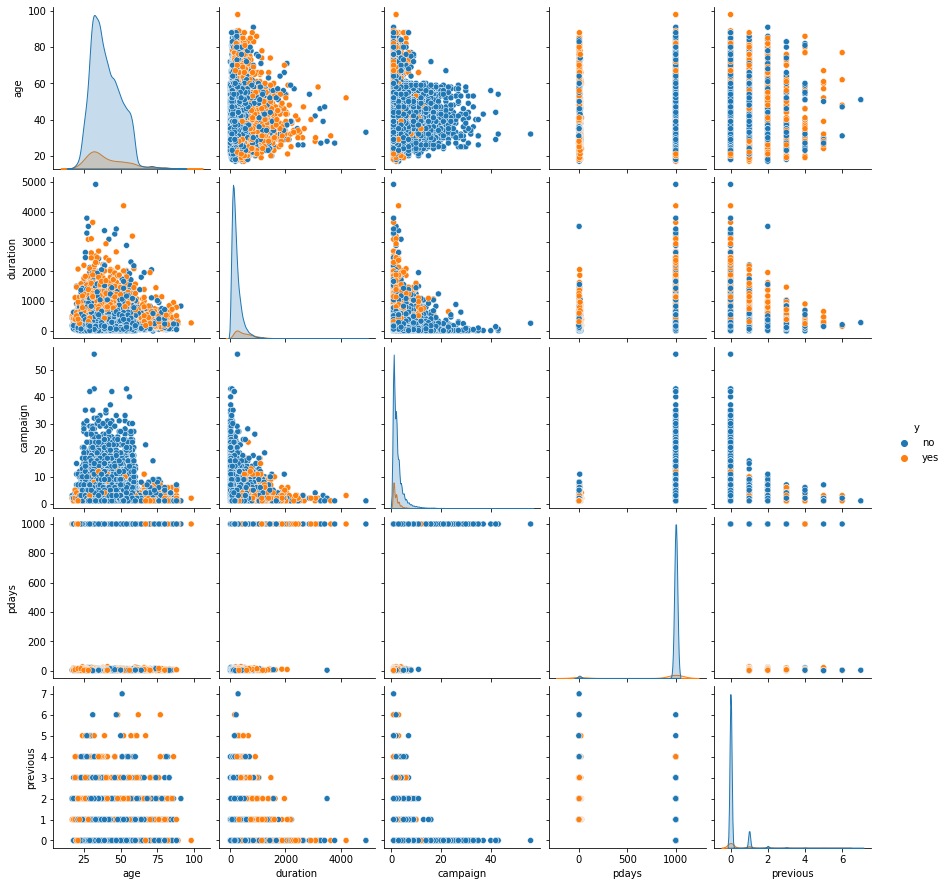

In [ ]:
cols=['age', 'duration', 'campaign', 'pdays', 'previous', 'y']
sns.pairplot(data=df[cols], hue='y', diag_kind='kde')

## Correlation plot of Continuous features

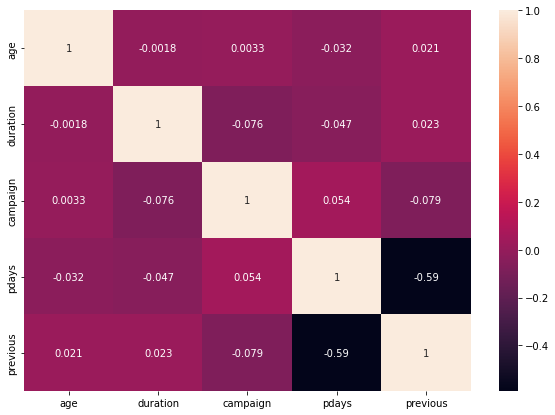

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

Seems that there is not a big problem of multicollinearity in this dataset.

## Dealing with Categorical Features

In [4]:
cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_new=pd.get_dummies(data=df, drop_first=True, columns=cat_cols)

In [5]:
df_new.loc[df_new['y']=='yes', 'Y']=1
df_new.loc[df['y']=='no', 'Y']=0
df_new.drop(['y'], inplace=True, axis=1)

In [6]:
train_cols=[k for k in df_new.columns if k not in ['Y']]

## Splitting train and test data

In [7]:
df_test=df_new.loc[len(df_new)*0.8:, :]
df_final=df_new.loc[:len(df_new)*0.8, :]

## Scaling the continuous features

In [8]:
sc=StandardScaler()
scaled_df=sc.fit_transform(df_final[train_cols])

# Building KNN model

## Doing parameter tuning for KNN model using the data

In [ ]:
knn=KNeighborsClassifier()
params=dict(n_neighbors= list(range(1, 35)))
print(params)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]}


In [ ]:
grid=GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid.fit(scaled_df, df_final['Y'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'n_neighbors': 21}


In [ ]:
mean_scores=grid.cv_results_['mean_test_score']

In [ ]:
"""uniform_mean_scores=[]
distance_mean_scores=[]
for i in range(len(mean_score)):
  if i%2==0:
    uniform_mean_scores.append(mean_score[i])
  else:
    distance_mean_scores.append(mean_score[i])"""

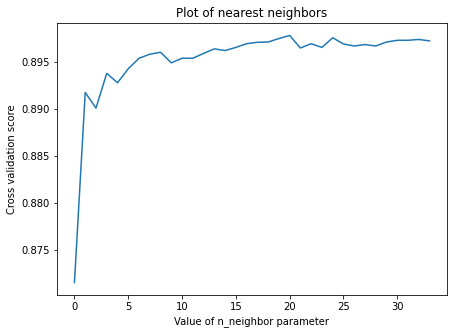

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Plot of nearest neighbors')
plt.xlabel('Value of n_neighbor parameter')
plt.ylabel('Cross validation score')
sns.lineplot(data=mean_scores)
plt.show()

So, the highest cross validation score is at n=21.

## Creating KNN model using StratifiedKFold cross validation and analyzing its performance

In [16]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=21);
oof=np.zeros(len(df_final));
test_predictions=np.zeros(len(df_test))
i=0;
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_final, df_final["Y"])):

  #Diving into training and val set
  print("fold {}".format(fold_))
  train_x=df_final[train_cols].iloc[trn_idx]
  train_y=df_final["Y"].iloc[trn_idx]

  val_x = df_final[train_cols].iloc[val_idx]
  val_y=df_final["Y"].iloc[val_idx]

  #Standard Scaling
  sc=StandardScaler()
  scaled_trn_x=sc.fit_transform(train_x)
  scaled_val_x=sc.transform(val_x)
  scaled_test_x=sc.transform(df_test[train_cols])

  #Calling the Classifier
  knn=KNeighborsClassifier(n_neighbors=21).fit(scaled_trn_x, train_y)
  oof[val_idx]+=knn.predict(scaled_val_x)

  #prediction for test data
  test_predictions+=knn.predict(scaled_test_x)

test_prediction=np.zeros(len(df_test))
for i in range(len(test_predictions)):
  if(test_predictions[i]>=3):
    test_prediction[i]=1
  else:
    test_prediction[i]=0

fold 0
fold 1
fold 2
fold 3
fold 4


## Analysing the performance of KNN

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc=accuracy_score(df_final['Y'], oof)
auc_roc=roc_auc_score(df_final['Y'], oof)
f1=f1_score(df_final['Y'], oof)
print('The accuracy score on cross validation data is ', acc)
print('The roc-auc score on cross validation data is ', auc_roc)

The accuracy score on cross validation data is  0.8970069420735177
The roc-auc score on cross validation data is  0.6001369775157691
The F1 score on cross validation data is  0.3210802700675169


In [ ]:
acc=accuracy_score(df_test['Y'], test_prediction)
auc_roc=roc_auc_score(df_test['Y'], test_prediction)
print('The accuracy score on test data is ', acc)
print('The roc-auc score on test data is ', auc_roc)

The accuracy score on test data is  0.8960546282245827
The roc-auc score on test data is  0.6137590837249024


# Building Logistic Regression model 

In [22]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=21);
oof=np.zeros(len(df_final));
test_predictions=np.zeros(len(df_test))
i=0;
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_final, df_final["Y"])):

  #Diving into training and val set
  print("fold {}".format(fold_))
  train_x=df_final[train_cols].iloc[trn_idx]
  train_y=df_final["Y"].iloc[trn_idx]

  val_x = df_final[train_cols].iloc[val_idx]
  val_y=df_final["Y"].iloc[val_idx]

  #Standard Scaling
  sc=StandardScaler()
  scaled_trn_x=sc.fit_transform(train_x)
  scaled_val_x=sc.transform(val_x)
  scaled_test_x=sc.transform(df_test[train_cols])

  #Calling the Classifier
  lg=KNeighborsClassifier(n_neighbors=21).fit(scaled_trn_x, train_y)
  oof[val_idx]=lg.predict(scaled_val_x)

  #prediction for test data
  test_predictions+=lg.predict(scaled_test_x)

test_prediction=np.zeros(len(df_test))
for i in range(len(test_predictions)):
  if(test_predictions[i]>=3):
    test_prediction[i]=1
  else:
    test_prediction[i]=0

fold 0
fold 1
fold 2
fold 3
fold 4


## Analysing the performance of Logistic Regression

In [23]:
acc=accuracy_score(df_final['Y'], oof)
auc_roc=roc_auc_score(df_final['Y'], oof)
print('The accuracy score on cross validation data is ', acc)
print('The roc-auc score on cross validation data is ', auc_roc)

The accuracy score on cross validation data is  0.8970069420735177
The roc-auc score on cross validation data is  0.6001369775157691


In [24]:
acc=accuracy_score(df_test['Y'], test_prediction)
auc_roc=roc_auc_score(df_test['Y'], test_prediction)
print('The accuracy score on test data is ', acc)
print('The roc-auc score on test data is ', auc_roc)

The accuracy score on test data is  0.8960546282245827
The roc-auc score on test data is  0.6137590837249024


# Building Decision Tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier

## Doing parameter tuning for Decision Tree algorithm using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=21)

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 5,
    verbose=True
)

grid_search.fit(df_final[train_cols], df_final['Y'])

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=21)

## Creating Decision Tree model using StratifiedKFold cross validation and analyzing its performance

In [26]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=21);
oof=np.zeros(len(df_final));
test_predictions=np.zeros(len(df_test))
i=0;
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_final, df_final["Y"])):

  #Diving into training and val set
  print("fold {}".format(fold_))
  train_x=df_final[train_cols].iloc[trn_idx]
  train_y=df_final["Y"].iloc[trn_idx]

  val_x = df_final[train_cols].iloc[val_idx]
  val_y=df_final["Y"].iloc[val_idx]

  #Standard Scaling
  sc=StandardScaler()
  scaled_trn_x=sc.fit_transform(train_x)
  scaled_val_x=sc.transform(val_x)
  scaled_test_x=sc.transform(df_test[train_cols])

  #Calling the Classifier
  dtc=DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=21).fit(scaled_trn_x, train_y)
  oof[val_idx]=dtc.predict(scaled_val_x)

  #prediction for test data
  test_predictions+=dtc.predict(scaled_test_x)

test_prediction=np.zeros(len(df_test))
for i in range(len(test_predictions)):
  if(test_predictions[i]>=3):
    test_prediction[i]=1
  else:
    test_prediction[i]=0

fold 0
fold 1
fold 2
fold 3
fold 4


## Analysing the performance Decision Tree

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc=accuracy_score(df_final['Y'], oof)
auc_roc=roc_auc_score(df_final['Y'], oof)
print('The accuracy score on cross validation data is ', acc)
print('The roc-auc score on cross validation data is ', auc_roc)

acc=accuracy_score(df_test['Y'], test_prediction)
auc_roc=roc_auc_score(df_test['Y'], test_prediction)
print('The accuracy score on test data is ', acc)
print('The roc-auc score on test data is ', auc_roc)

The accuracy score on cross validation data is  0.8999279238268655
The roc-auc score on cross validation data is  0.5943718118313742
The accuracy score on test data is  0.8990895295902883
The roc-auc score on test data is  0.5852917037130672


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(16,8), dpi=150)
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'].loc[:10], y=fi_df['feature_names'][:10])
  #Add chart labels
  plt.title(model_type + 'Feature Importance')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Names')

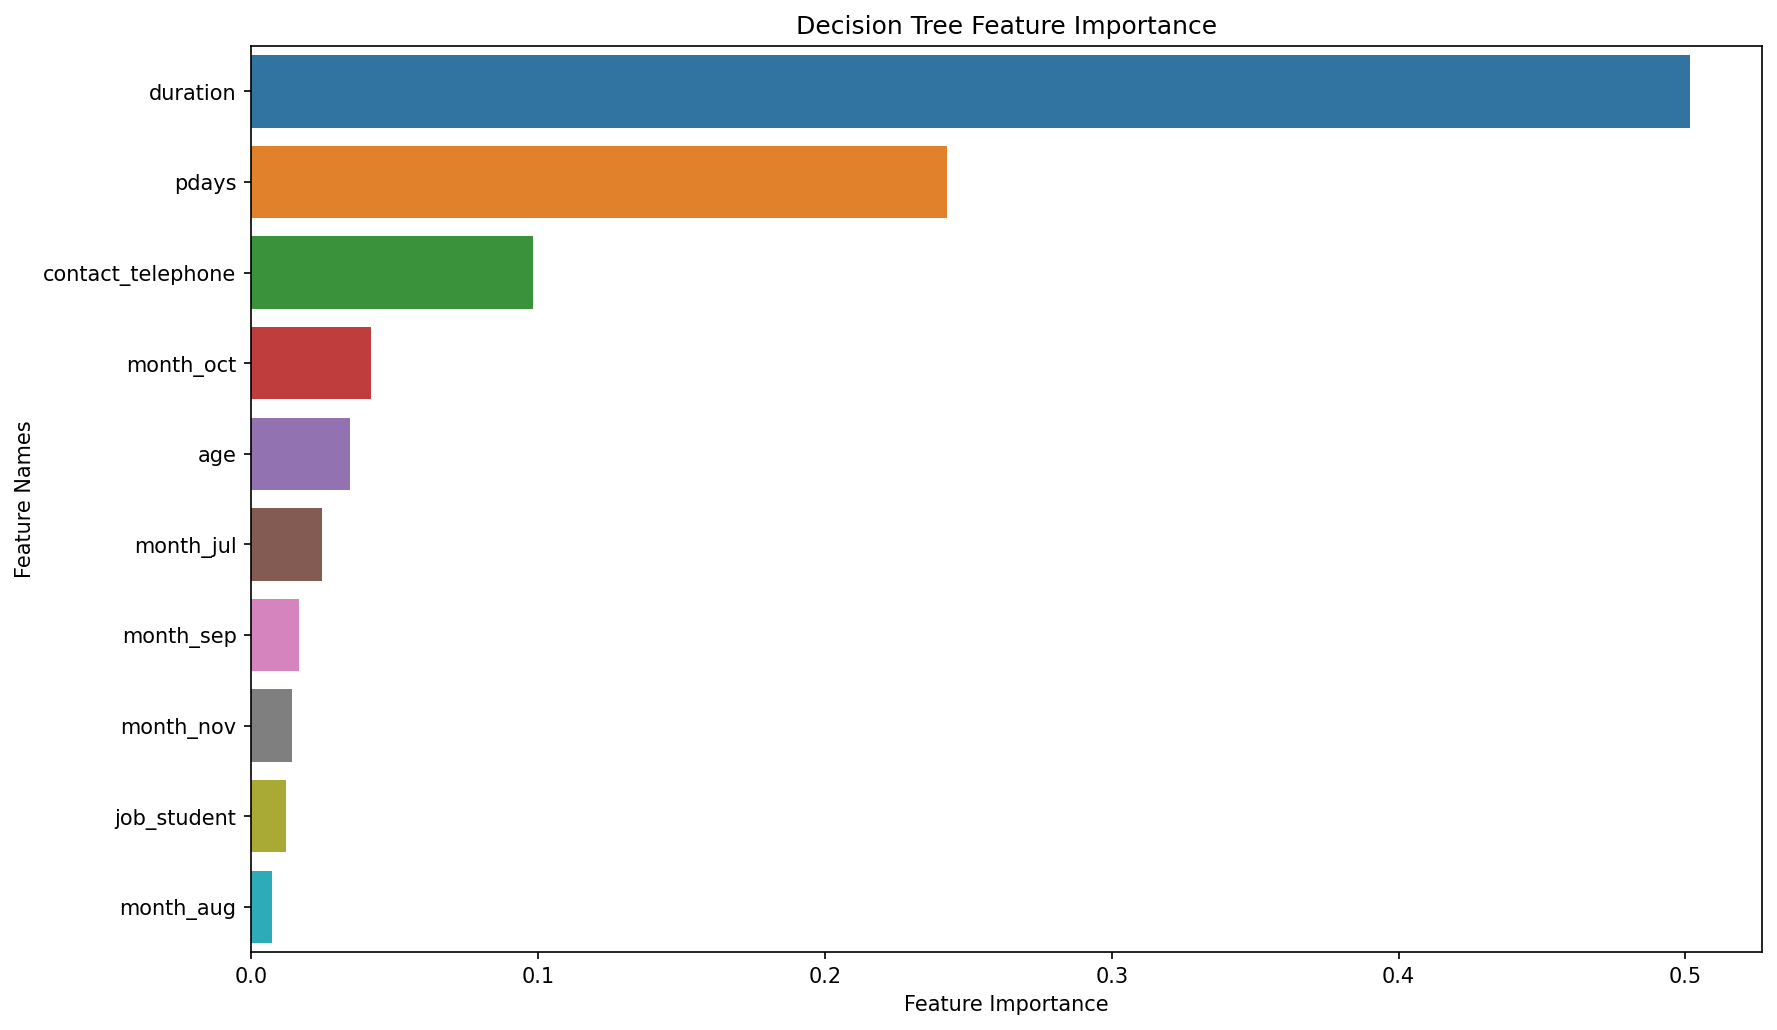

In [79]:
plot_feature_importance(dtc.feature_importances_,train_cols,'Decision Tree ')
plt.savefig('dtc_10.png')

# Building Random Forest model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Doing parameter tuning for Random Forest algorithm using GridSearchCV

In [ ]:
estimator = RandomForestClassifier(random_state=21)

parameters = { 
    'n_estimators': list(range(1, 200, 40)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss'],

}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 5,
    verbose=True
)

grid_search.fit(df_final[train_cols], df_final['Y'])

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
525 fits failed out of a total of 1575.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
525 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 41, 81, 121, 161]},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=161,
                       random_state=21)

## Creating Random Forest model using StratifiedKFold cross validation and analyzing its performance

In [29]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=21);
oof=np.zeros(len(df_final));
test_predictions=np.zeros(len(df_test))
i=0;
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_final, df_final["Y"])):

  #Diving into training and val set
  print("fold {}".format(fold_))
  train_x=df_final[train_cols].iloc[trn_idx]
  train_y=df_final["Y"].iloc[trn_idx]

  val_x = df_final[train_cols].iloc[val_idx]
  val_y=df_final["Y"].iloc[val_idx]

  #Standard Scaling
  sc=StandardScaler()
  scaled_trn_x=sc.fit_transform(train_x)
  scaled_val_x=sc.transform(val_x)
  scaled_test_x=sc.transform(df_test[train_cols])

  #Calling the Classifier
  rfc=RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=161,
                       random_state=21).fit(scaled_trn_x, train_y)
  oof[val_idx]=rfc.predict(scaled_val_x)

  #prediction for test data
  test_predictions+=rfc.predict(scaled_test_x)

test_prediction=np.zeros(len(df_test))
for i in range(len(test_predictions)):
  if(test_predictions[i]>=3):
    test_prediction[i]=1
  else:
    test_prediction[i]=0

fold 0
fold 1
fold 2
fold 3
fold 4


## Analysing the performance Random Forest

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc=accuracy_score(df_final['Y'], oof)
auc_roc=roc_auc_score(df_final['Y'], oof)
print('The accuracy score on cross validation data is ', acc)
print('The roc-auc score on cross validation data is ', auc_roc)

acc=accuracy_score(df_test['Y'], test_prediction)
auc_roc=roc_auc_score(df_test['Y'], test_prediction)
print('The accuracy score on test data is ', acc)
print('The roc-auc score on test data is ', auc_roc)

The accuracy score on cross validation data is  0.9012177079776943
The roc-auc score on cross validation data is  0.5884292758198099
The accuracy score on test data is  0.9010622154779969
The roc-auc score on test data is  0.5955192092849282


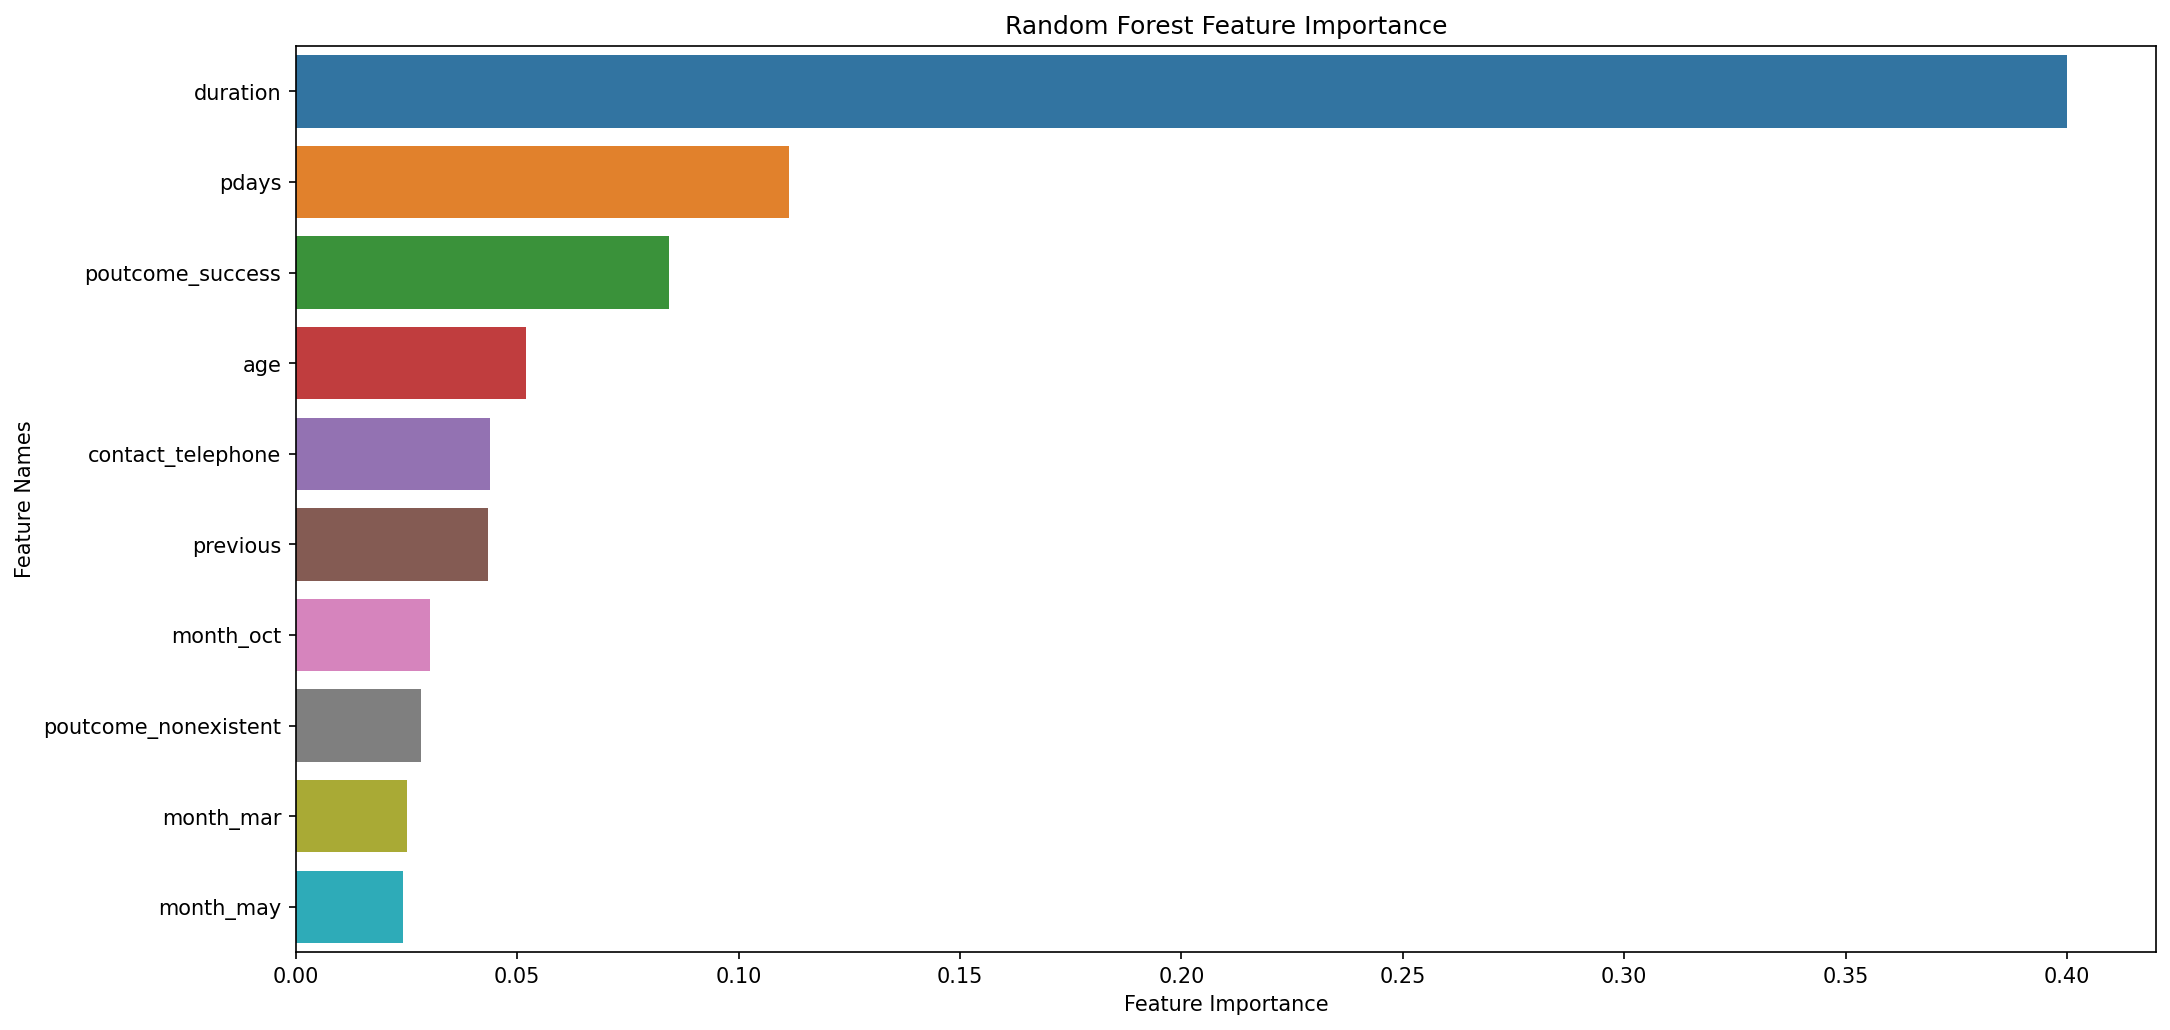

In [88]:
plot_feature_importance(rfc.feature_importances_,train_cols,'Random Forest ')
plt.savefig('rf_2.png')

# Building Adaboost model

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

## Doing parameter tuning for Adaboost algorithm using GridSearchCV

In [ ]:
estimator = AdaBoostClassifier(random_state=21)

parameters = { 
    'n_estimators': list(range(1, 200, 40)),
    'learning_rate' : [0.001, 0.01, 1, 5, 10],
    'algorithm' :['SAMME', 'SAMME.R'],

}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 5,
    verbose=True
)

grid_search.fit(df_final[train_cols], df_final['Y'])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 4, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 4, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=21),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 1, 5, 10],
                         'n_estimators': [1, 41, 81, 121, 161]},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=121, random_state=21)

## Creating AdaBoost model using StratifiedKFold cross validation and analyzing its performance

In [32]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=21);
oof=np.zeros(len(df_final));
test_predictions=np.zeros(len(df_test))
i=0;
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_final, df_final["Y"])):

  #Diving into training and val set
  print("fold {}".format(fold_))
  train_x=df_final[train_cols].iloc[trn_idx]
  train_y=df_final["Y"].iloc[trn_idx]

  val_x = df_final[train_cols].iloc[val_idx]
  val_y=df_final["Y"].iloc[val_idx]

  #Standard Scaling
  sc=StandardScaler()
  scaled_trn_x=sc.fit_transform(train_x)
  scaled_val_x=sc.transform(val_x)
  scaled_test_x=sc.transform(df_test[train_cols])

  #Calling the Classifier
  abc=AdaBoostClassifier(learning_rate=1, n_estimators=121, random_state=21).fit(scaled_trn_x, train_y)
  oof[val_idx]=abc.predict(scaled_val_x)

  #prediction for test data
  test_predictions+=abc.predict(scaled_test_x)

test_prediction=np.zeros(len(df_test))
for i in range(len(test_predictions)):
  if(test_predictions[i]>=3):
    test_prediction[i]=1
  else:
    test_prediction[i]=0

fold 0
fold 1
fold 2
fold 3
fold 4


## Analysing the performance AdaBoost model

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc=accuracy_score(df_final['Y'], oof)
auc_roc=roc_auc_score(df_final['Y'], oof)
print('The accuracy score on cross validation data is ', acc)
print('The roc-auc score on cross validation data is ', auc_roc)

acc=accuracy_score(df_test['Y'], test_prediction)
auc_roc=roc_auc_score(df_test['Y'], test_prediction)
print('The accuracy score on test data is ', acc)
print('The roc-auc score on test data is ', auc_roc)

The accuracy score on cross validation data is  0.9042145593869731
The roc-auc score on cross validation data is  0.6735487830970336
The accuracy score on test data is  0.9033383915022761
The roc-auc score on test data is  0.6742583953534873


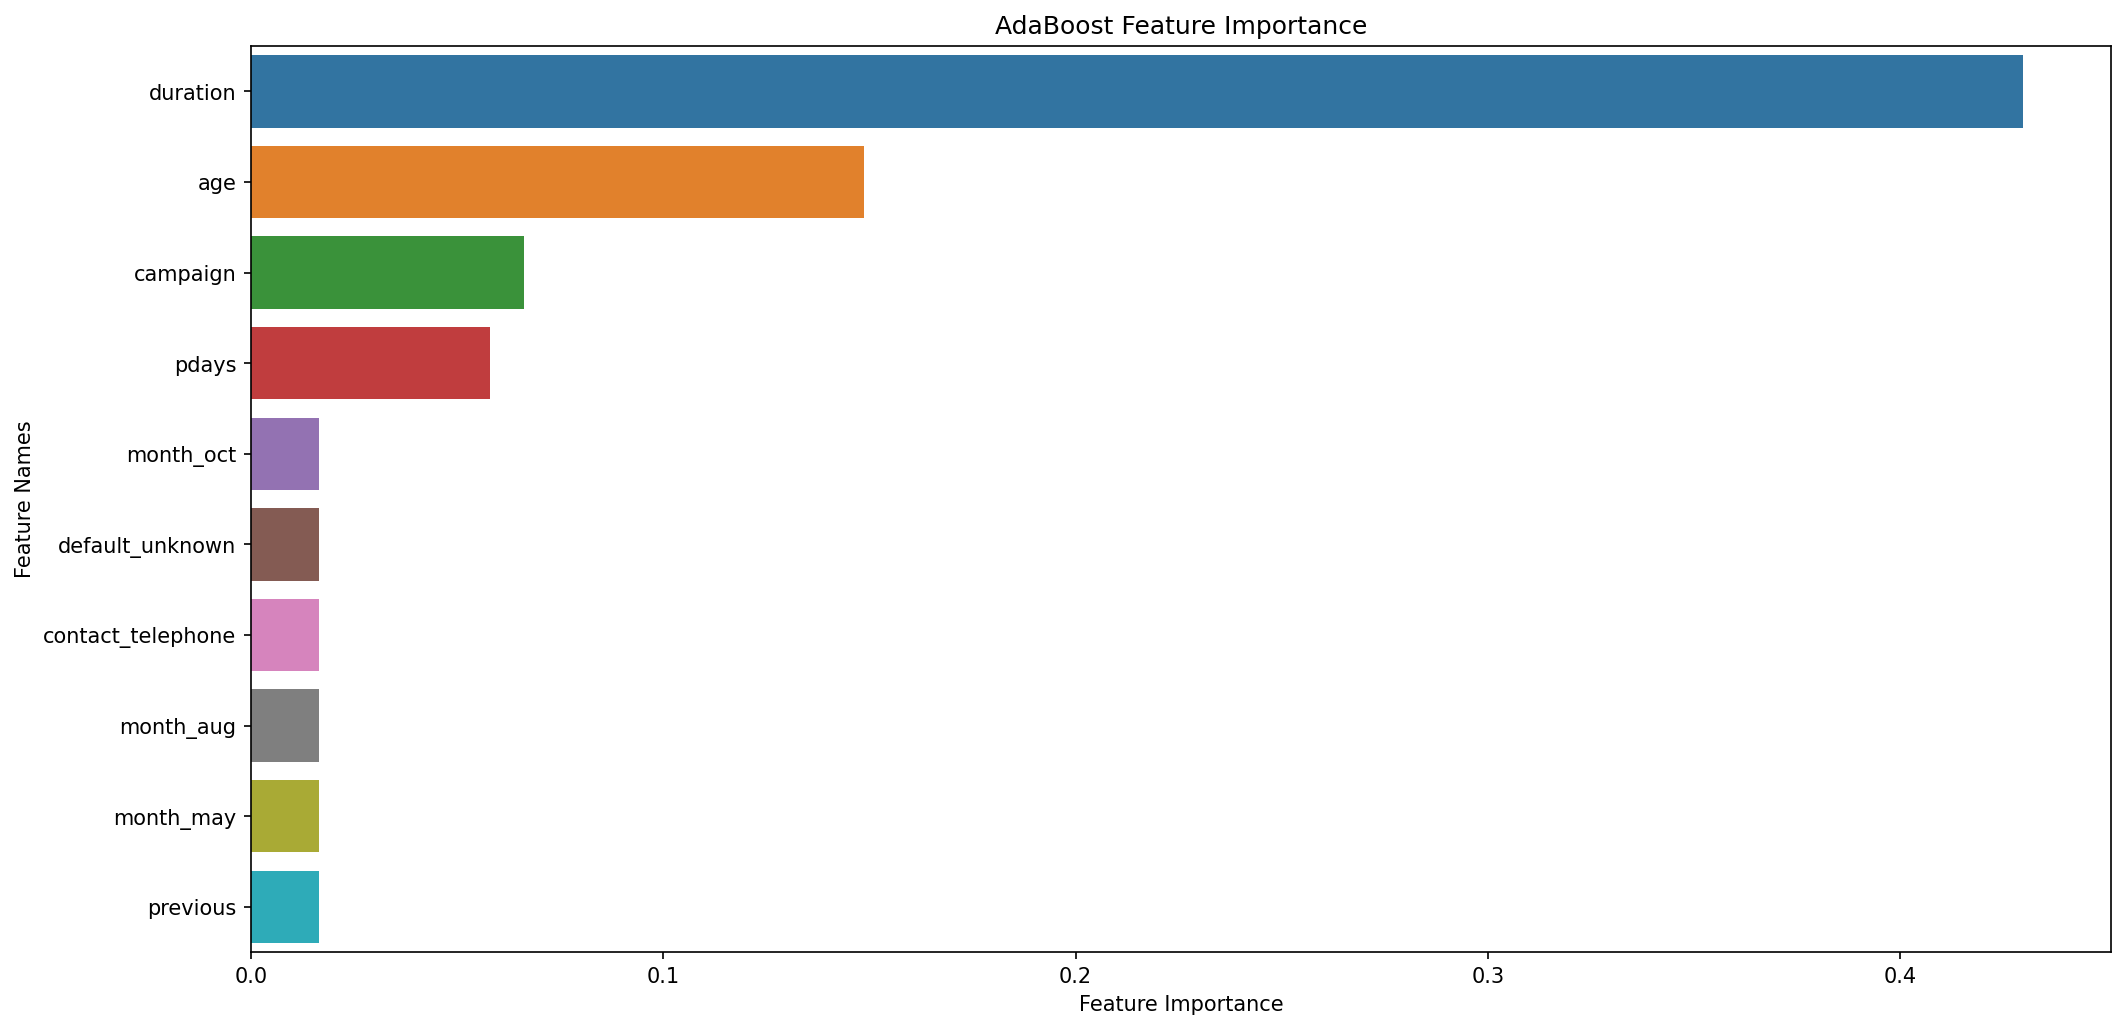

In [90]:
plot_feature_importance(abc.feature_importances_,train_cols,'AdaBoost ')
plt.savefig('ab.png')

# Building Support Vector Classifier

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Hyperparameter Tuning 

In [96]:
estimator = SVC(random_state=21)

parameters = { 
    'C': [0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree' : [0.01, 0.1],
    'gamma' : [0.01, 0.1,]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 5,
    verbose=True
)

grid_search.fit(scaled_df, df_final['Y'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(random_state=21),
             param_grid={'C': [0.01, 0.1], 'kernel': ['linear', 'poly', 'rbf']},
             scoring='roc_auc', verbose=True)

In [97]:
grid_search.best_estimator_

SVC(C=0.1, kernel='linear', random_state=21)

## Creating the model

In [98]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=21);
oof=np.zeros(len(df_final));
test_predictions=np.zeros(len(df_test))
i=0;
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_final, df_final["Y"])):

  #Diving into training and val set
  print("fold {}".format(fold_))
  train_x=df_final[train_cols].iloc[trn_idx]
  train_y=df_final["Y"].iloc[trn_idx]

  val_x = df_final[train_cols].iloc[val_idx]
  val_y=df_final["Y"].iloc[val_idx]

  #Standard Scaling
  sc=StandardScaler()
  scaled_trn_x=sc.fit_transform(train_x)
  scaled_val_x=sc.transform(val_x)
  scaled_test_x=sc.transform(df_test[train_cols])

  #Calling the Classifier
  svc=SVC(C=0.1, kernel='linear', random_state=21).fit(scaled_trn_x, train_y)
  oof[val_idx]=svc.predict(scaled_val_x)

  #prediction for test data
  test_predictions+=svc.predict(scaled_test_x)

test_prediction=np.zeros(len(df_test))
for i in range(len(test_predictions)):
  if(test_predictions[i]>=3):
    test_prediction[i]=1
  else:
    test_prediction[i]=0

fold 0
fold 1
fold 2
fold 3
fold 4


## Analysing the performance

In [99]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc=accuracy_score(df_final['Y'], oof)
auc_roc=roc_auc_score(df_final['Y'], oof)
print('The accuracy score on cross validation data is ', acc)
print('The roc-auc score on cross validation data is ', auc_roc)

acc=accuracy_score(df_test['Y'], test_prediction)
auc_roc=roc_auc_score(df_test['Y'], test_prediction)
print('The accuracy score on test data is ', acc)
print('The roc-auc score on test data is ', auc_roc)

The accuracy score on cross validation data is  0.8977656386328288
The roc-auc score on cross validation data is  0.5950809889773162
The accuracy score on test data is  0.895144157814871
The roc-auc score on test data is  0.5984372248229365
